*Day 4*
# Decision Tree
---

Decision Tree is a hierarchy of if/else question

- Nonparametric approach
- High interpretability

Information gain paling besar atau entropy paling kecil

# Try 

In [5]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [6]:
#ML Library

#ML Models
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

In [11]:
#Load bankloan dataset

df = pd.read_csv('/Users/Dwika/My Projects/DATASETS/bankloan.csv')

In [12]:
#Train test split

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('default', axis=1), 
                                                df['default'], 
                                                test_size=.2, 
                                                random_state=2020,
                                                stratify=df['default'])

In [20]:
#Modeling with Decision Tree, varying max_depth parameter 
#Create looping

md = np.arange(1, 21,1)
crit = ['gini', 'entropy']
acc_score = []
krit = []

for i in md:
    for j in crit:
        dtc = DecisionTreeClassifier(max_depth=i, criterion=j, random_state=2020)
        dtc.fit(xtrain, ytrain)
        ypred = dtc.predict(xtest)
        acc_score.append(accuracy_score(ytest, ypred))
        krit.append((i,j))

In [21]:
#Create dataframe of result

df_result = pd.DataFrame({'criterion':krit, 'accuracy_score':acc_score})

In [22]:
df_result.sort_values(by='accuracy_score', ascending=False).head(10)

,criterion,accuracy_score
22,"(12, gini)",0.792857
28,"(15, gini)",0.792857
26,"(14, gini)",0.785714
7,"(4, entropy)",0.778571
18,"(10, gini)",0.778571
24,"(13, gini)",0.778571
20,"(11, gini)",0.778571
6,"(4, gini)",0.778571
5,"(3, entropy)",0.778571
4,"(3, gini)",0.778571


In [23]:
# Best decision tree model 

tree = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=2020)
tree.fit(xtrain, ytrain)
tree

DecisionTreeClassifier(max_depth=12, random_state=2020)

In [26]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [27]:
xtrain

,age,ed,employ,address,income,debtinc,creddebt,othdebt
382,39,2,2,12,46,16.0,4.003840,3.356160
344,44,2,18,4,74,13.4,4.521696,5.394304
265,33,1,7,0,22,6.4,0.630784,0.777216
52,46,1,16,18,52,12.9,3.032016,3.675984
370,34,1,13,11,51,9.6,1.875168,3.020832
...,...,...,...,...,...,...,...,...
476,25,1,3,2,18,16.3,0.352080,2.581920
135,29,2,6,7,57,2.2,0.452694,0.801306
506,52,1,19,25,89,4.7,0.397385,3.785615
684,34,1,18,10,53,10.5,0.840315,4.724685


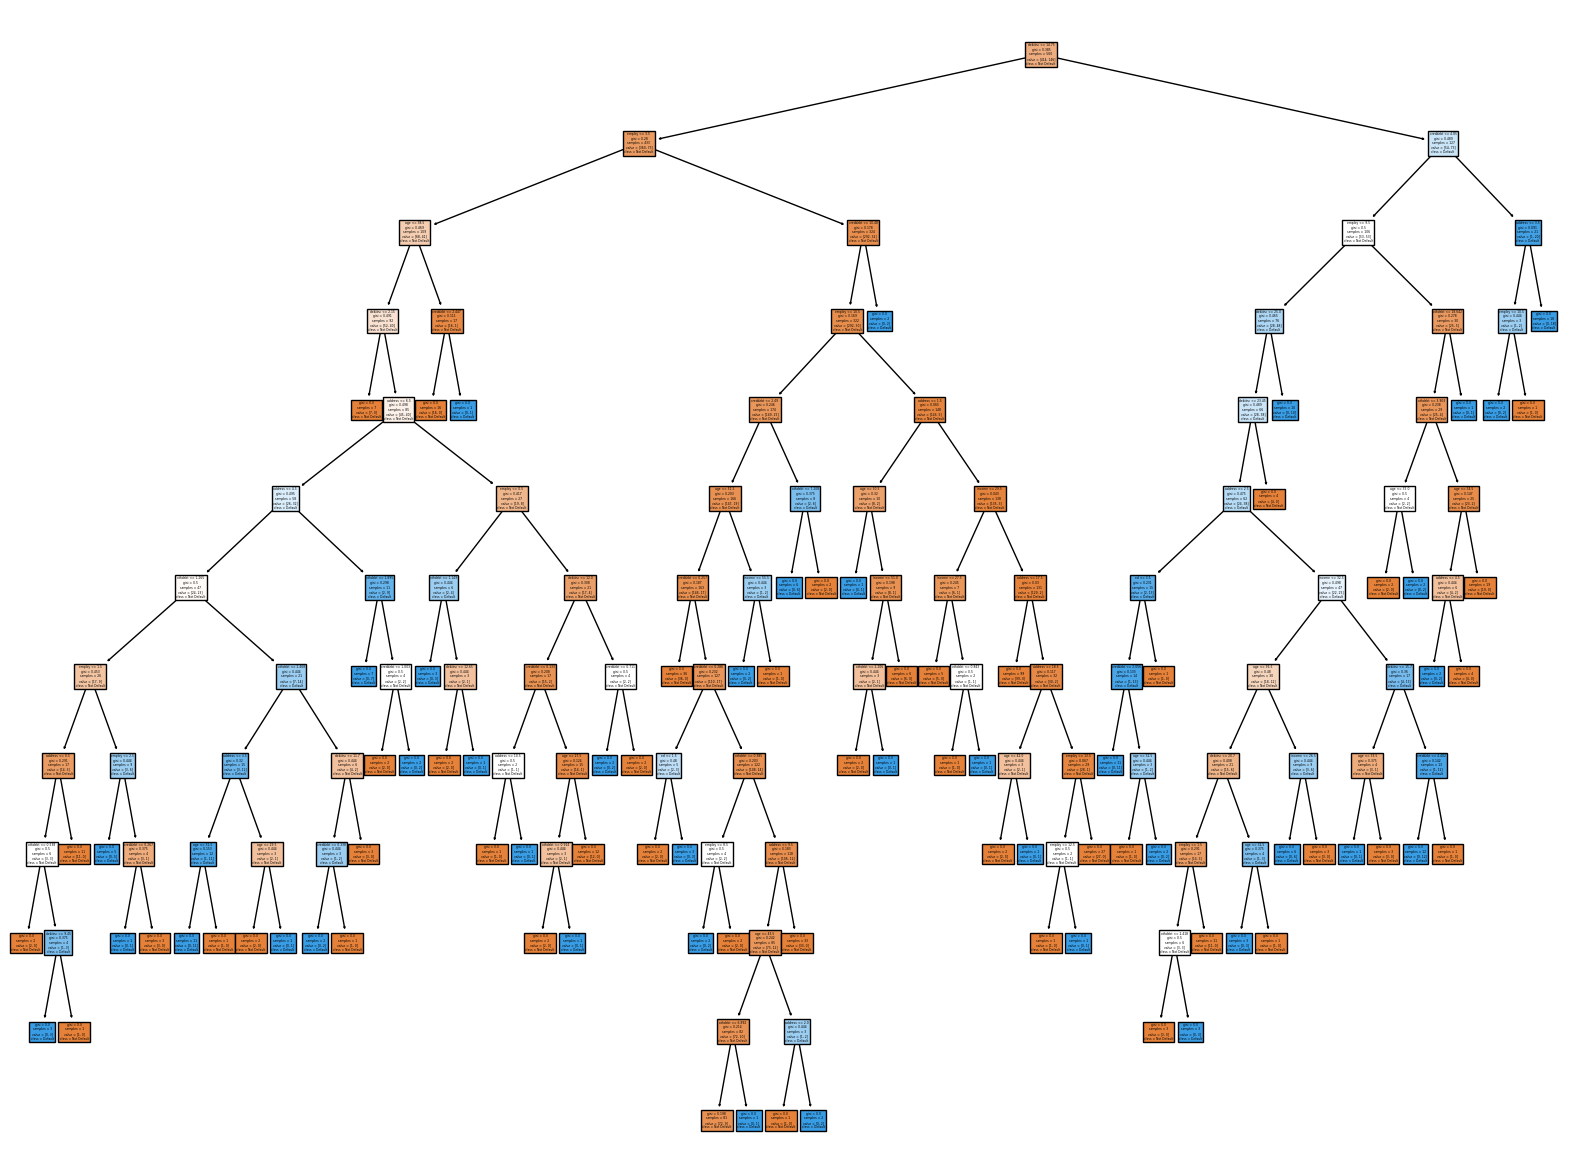

In [37]:
#Decision Tree Visualization

plt.figure(figsize=(20,15))
plot_tree(tree, feature_names=list(xtrain.columns), class_names=['Not Default', 'Default'], filled=True)
plt.show()